In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
# Load the breast cancer dataset
cancer_data = load_breast_cancer()

In [3]:
# Convert the dataset to a DataFrame
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)


In [4]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)


In [5]:
# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

In [6]:
# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

In [7]:
# Concatenate the PCA components with the target variable
pca_df['target'] = cancer_data.target

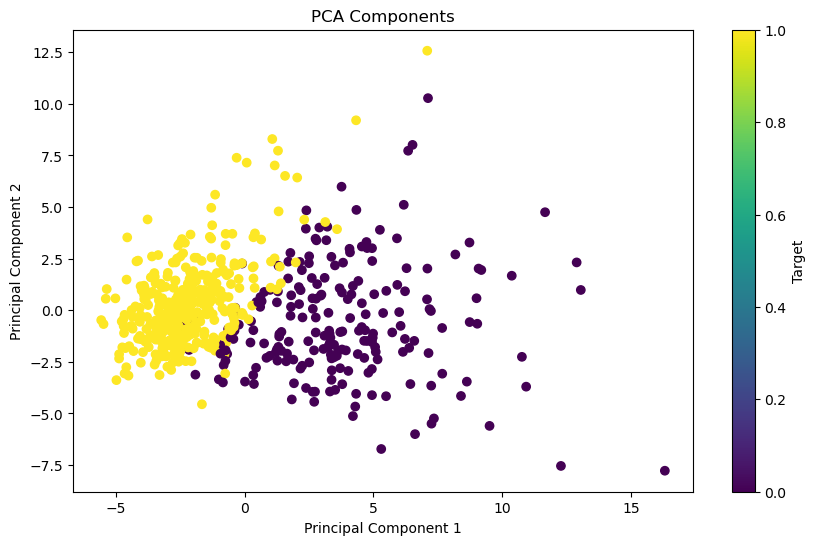

In [8]:
# Visualize the PCA components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['target'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Components')
plt.colorbar(label='Target')
plt.show()

In [9]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(pca_df.drop('target', axis=1), pca_df['target'], test_size=0.2, random_state=42)

In [10]:
# Optional: Implement Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [11]:
# Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy)

Accuracy of Logistic Regression: 0.9912280701754386
